## それぞれのpdbに対してreplaced, non-replaced水分子を取得する

In [1]:
import sys
sys.path.append('../..')
from lib.water import get_displaceable_water_nums_by_pdb_list, get_non_displaceable_water_nums_by_pdb_list
from lib.pdb import get_all_pdb_names
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pdb_names = get_all_pdb_names()

In [21]:
DATA_TYPE1 = 'gr'
DATA_VOXEL_NUM = 10
CLASSIFYING_RULE = 'WaterClassifyingRuleEmbedding'
LIGAND_POCKET_DEFINER = 'LigandPocketDefinerOriginal'
LIGAND_VOXEL_NUM = 8

In [22]:
displaced_water = get_displaceable_water_nums_by_pdb_list(pdb_names=pdb_names, data_voxel_num=DATA_VOXEL_NUM, classifying_rule=CLASSIFYING_RULE, ligand_pocket_definer=LIGAND_POCKET_DEFINER, ligand_voxel_num=LIGAND_VOXEL_NUM)
non_displaced_water = get_non_displaceable_water_nums_by_pdb_list(pdb_names=pdb_names, data_voxel_num=DATA_VOXEL_NUM, classifying_rule=CLASSIFYING_RULE, ligand_pocket_definer=LIGAND_POCKET_DEFINER, ligand_voxel_num=LIGAND_VOXEL_NUM)

In [23]:
sum(displaced_water)

41871

In [24]:
sum(non_displaced_water) + sum(displaced_water)

82471

In [25]:
displaced_water[0], non_displaced_water[0]

(16, 10)

In [26]:
non_dis_ratio = np.array(non_displaced_water) / np.array(displaced_water)

In [27]:
non_dis_ratio

array([0.625     , 0.90909091, 0.90909091, ..., 0.79310345, 1.        ,
       0.8       ])

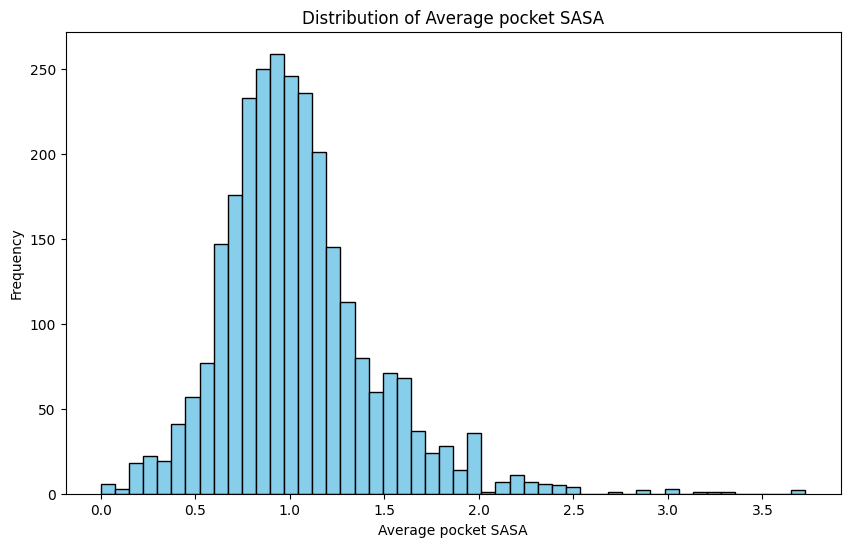

0.9318181818181818


In [28]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(non_dis_ratio, bins=50, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Average pocket SASA')
plt.xlabel('Average pocket SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [29]:
ratio_list = non_dis_ratio[non_dis_ratio < 0.33]
non_dis_ratio[non_dis_ratio < 0.5]


array([0.        , 0.2       , 0.        , 0.        , 0.2       ,
       0.2       , 0.33333333, 0.30769231, 0.46666667, 0.23529412,
       0.33333333, 0.42857143, 0.25      , 0.16666667, 0.33333333,
       0.14285714, 0.42857143, 0.4       , 0.25      , 0.4       ,
       0.375     , 0.33333333, 0.4       , 0.42105263, 0.1       ,
       0.18181818, 0.33333333, 0.38461538, 0.28571429, 0.19230769,
       0.21052632, 0.42857143, 0.42857143, 0.26666667, 0.38888889,
       0.23529412, 0.41666667, 0.44444444, 0.4       , 0.16666667,
       0.38095238, 0.45454545, 0.38888889, 0.46666667, 0.3125    ,
       0.3125    , 0.45714286, 0.28571429, 0.38888889, 0.33333333,
       0.47826087, 0.25      , 0.44444444, 0.41666667, 0.375     ,
       0.44444444, 0.23529412, 0.        , 0.2       , 0.33333333,
       0.21428571, 0.26666667, 0.34782609, 0.        , 0.47368421,
       0.38461538, 0.15789474, 0.19047619, 0.29411765, 0.375     ,
       0.23809524, 0.25      , 0.375     , 0.46153846, 0.26666

In [30]:
indices = np.where(non_dis_ratio < 0.33)[0]
indices

array([   5,    6,    7,    8,    9,   11,   28,  150,  242,  243,  293,
        392,  536,  539,  650,  700,  711,  720,  739,  795,  894,  895,
       1035, 1238, 1394, 1427, 1428, 1442, 1471, 1499, 1575, 1582, 1595,
       1647, 1649, 1669, 1714, 1745, 1757, 1786, 2212, 2213, 2358, 2359,
       2405, 2431, 2442, 2443, 2446, 2467, 2507, 2511, 2523, 2528, 2644])

In [31]:
len(np.array(pdb_names)[indices].tolist())

55

In [33]:
np.array(pdb_names)[indices]

array(['184l', '185l', '186l', '187l', '188l', '1a28', '2p2a', '1xap',
       '5t0t', '5tbm', '4xaq', '1lgw', '1dzk', '1e3g', '4zv1', '4omk',
       '4p6w', '4poj', '3iod', '3f78', '1fcz', '1fd0', '1n46', '4kwf',
       '2w8y', '3f3c', '3f3d', '3b5r', '3uex', '4ykj', '1rjk', '1s19',
       '1sr7', '4v24', '4w52', '4pp5', '5hcv', '1kdk', '1l83', '3ctt',
       '5l7g', '5l7h', '3b65', '3b66', '4xt2', '1u1w', '1usk', '1i37',
       '1ie9', '4m8e', '1qkt', '1z95', '2o4j', '2o4r', '1ajn'],
      dtype='<U4')

In [32]:
{pdb: ratio for pdb, ratio in zip(np.array(pdb_names)[indices], ratio_list)}

{'184l': 0.0,
 '185l': 0.2,
 '186l': 0.0,
 '187l': 0.0,
 '188l': 0.2,
 '1a28': 0.2,
 '2p2a': 0.3076923076923077,
 '1xap': 0.23529411764705882,
 '5t0t': 0.25,
 '5tbm': 0.16666666666666666,
 '4xaq': 0.14285714285714285,
 '1lgw': 0.25,
 '1dzk': 0.1,
 '1e3g': 0.18181818181818182,
 '4zv1': 0.2857142857142857,
 '4omk': 0.19230769230769232,
 '4p6w': 0.21052631578947367,
 '4poj': 0.26666666666666666,
 '3iod': 0.23529411764705882,
 '3f78': 0.16666666666666666,
 '1fcz': 0.3125,
 '1fd0': 0.3125,
 '1n46': 0.2857142857142857,
 '4kwf': 0.25,
 '2w8y': 0.23529411764705882,
 '3f3c': 0.0,
 '3f3d': 0.2,
 '3b5r': 0.21428571428571427,
 '3uex': 0.26666666666666666,
 '4ykj': 0.0,
 '1rjk': 0.15789473684210525,
 '1s19': 0.19047619047619047,
 '1sr7': 0.29411764705882354,
 '4v24': 0.23809523809523808,
 '4w52': 0.25,
 '4pp5': 0.26666666666666666,
 '5hcv': 0.21428571428571427,
 '1kdk': 0.23076923076923078,
 '1l83': 0.25,
 '3ctt': 0.3,
 '5l7g': 0.2857142857142857,
 '5l7h': 0.14285714285714285,
 '3b65': 0.3076923076

In [13]:
pdb_names[non_dis_ratio.argmax()]

'4ynl'

In [29]:
ratio_list = non_dis_ratio[non_dis_ratio > 2.0]

In [30]:
indices = np.where(non_dis_ratio > 2.0)[0]

In [31]:
{pdb: ratio for pdb, ratio in zip(np.array(pdb_names)[indices], ratio_list)}

{'1oe8': 2.25,
 '3e12': 2.0833333333333335,
 '2dw7': 2.3333333333333335,
 '3gqz': 2.3333333333333335,
 '4do5': 2.3333333333333335,
 '4nj9': 2.25,
 '5am7': 2.272727272727273,
 '1ado': 3.2,
 '4fht': 2.5,
 '4iie': 3.3333333333333335,
 '3c2f': 2.5,
 '3cdb': 2.3,
 '1uto': 2.5,
 '3n7a': 2.4,
 '1njd': 2.1818181818181817,
 '3pwk': 2.1666666666666665,
 '3q1x': 2.4,
 '3qfz': 2.2,
 '2fqx': 3.0,
 '5efc': 2.1,
 '4iid': 3.6666666666666665,
 '4kz3': 2.857142857142857,
 '3uil': 2.2857142857142856,
 '4ynl': 3.727272727272727,
 '4bi6': 2.4,
 '4umc': 2.2,
 '4wiv': 2.2,
 '5hbn': 2.1666666666666665,
 '3pce': 2.1666666666666665,
 '1koj': 2.125,
 '2ha3': 2.5,
 '2i19': 2.3333333333333335,
 '3mfw': 2.1666666666666665,
 '3mjl': 3.0,
 '3g2z': 2.142857142857143,
 '2qrl': 2.4285714285714284,
 '2qtg': 2.111111111111111,
 '1ew8': 3.25,
 '2xdx': 2.1666666666666665,
 '3ng4': 2.3333333333333335,
 '3zdg': 2.3333333333333335,
 '4fnn': 2.1666666666666665,
 '4efk': 2.2,
 '4cwf': 2.125,
 '2cht': 2.2857142857142856,
 '3rbu':